In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from imblearn.metrics import specificity_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline




In [ ]:
!gdown 14gJVzNmwJelNhT2jWFRAuQXhX35MYDaJ

Downloading...
From: https://drive.google.com/uc?id=14gJVzNmwJelNhT2jWFRAuQXhX35MYDaJ
To: /content/dataR2.csv
100% 7.67k/7.67k [00:00<00:00, 8.29MB/s]


In [ ]:
#učitavanje podataka
df = pd.read_csv("/content/dataR2.csv")

In [ ]:
df.shape

(116, 10)

In [ ]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [ ]:
df.isnull().sum() / df.shape[0] * 100
#nema null vrednosti


Age               0.0
BMI               0.0
Glucose           0.0
Insulin           0.0
HOMA              0.0
Leptin            0.0
Adiponectin       0.0
Resistin          0.0
MCP.1             0.0
Classification    0.0
dtype: float64

Age               0.0
BMI               0.0
Glucose           0.0
Insulin           0.0
HOMA              0.0
Leptin            0.0
Adiponectin       0.0
Resistin          0.0
MCP.1             0.0
Classification    0.0
dtype: float64

In [ ]:
df[df['Classification']==1].count()

Age               52
BMI               52
Glucose           52
Insulin           52
HOMA              52
Leptin            52
Adiponectin       52
Resistin          52
MCP.1             52
Classification    52
dtype: int64

<Axes: xlabel='Classification', ylabel='count'>

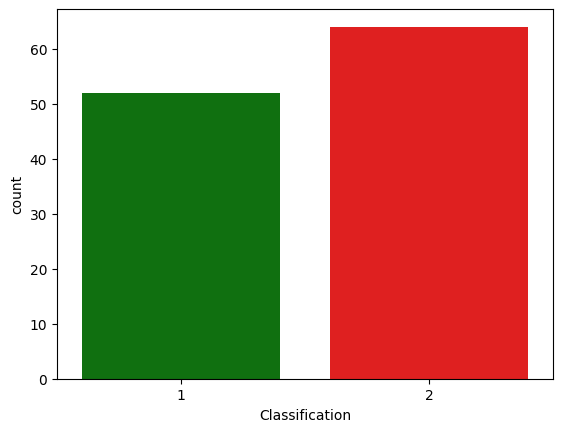

In [ ]:
#HISTOGRAM ZA B
sns.countplot(x=df["Classification"], palette=['green', 'red'])

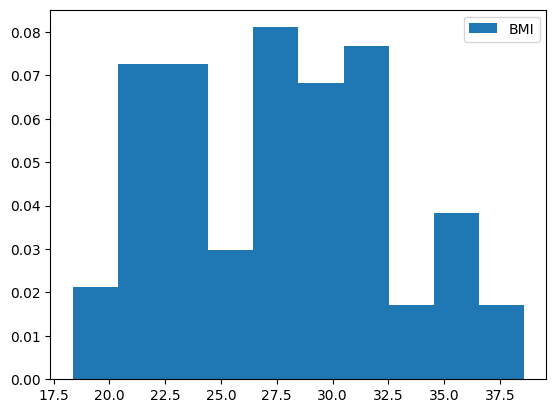

In [ ]:
#HISTOGRAM ZA BMI
plt.hist(df['BMI'], density=True, label='BMI')
plt.legend()

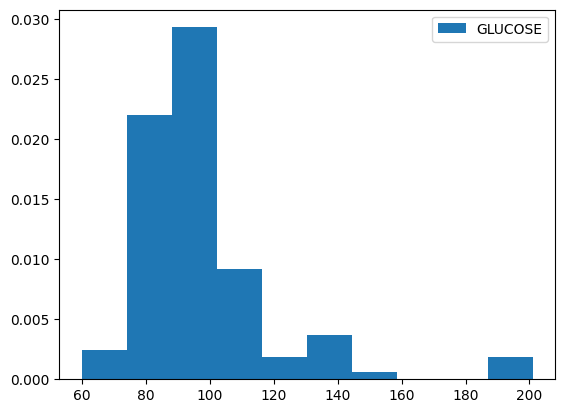

In [ ]:
#HISTOGRAM ZA GLUKOZU
plt.hist(df['Glucose'], density=True, label='GLUCOSE')
plt.legend()

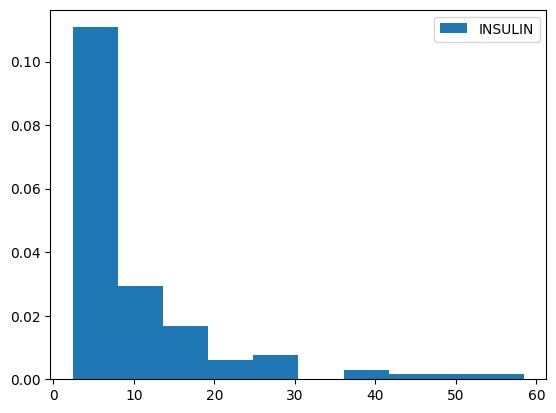

In [ ]:
#HISTOGRAM ZA INSULIN
plt.hist(df['Insulin'], density=True, label='INSULIN')
plt.legend()

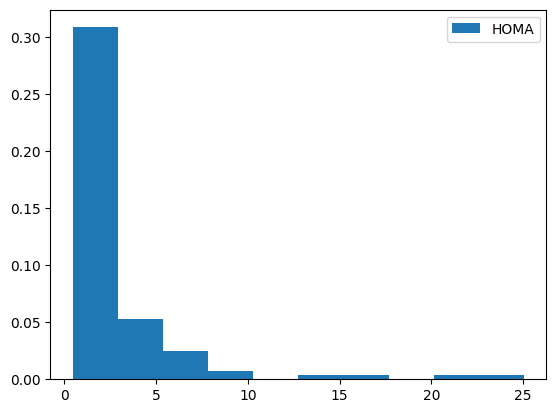

In [ ]:
#HISTOGRAM ZA HOMU
plt.hist(df['HOMA'], density=True, label='HOMA')
plt.legend()

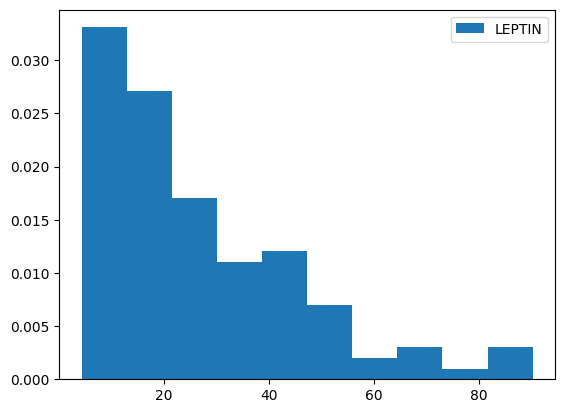

In [ ]:
#HISTOGRAM ZA LEPTIN
plt.hist(df['Leptin'], density=True, label='LEPTIN')
plt.legend()

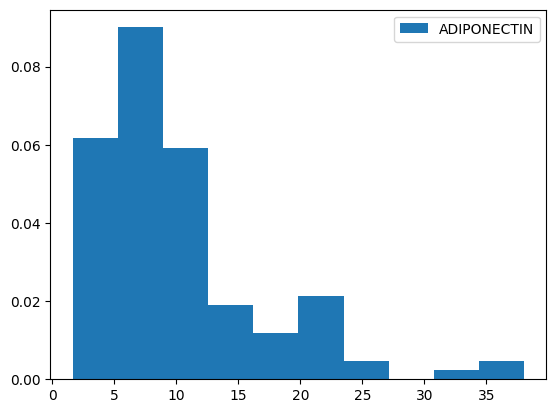

In [ ]:
#HISTOGRAM ZA ADIPONKTIN
plt.hist(df['Adiponectin'], density=True, label='ADIPONECTIN')
plt.legend()

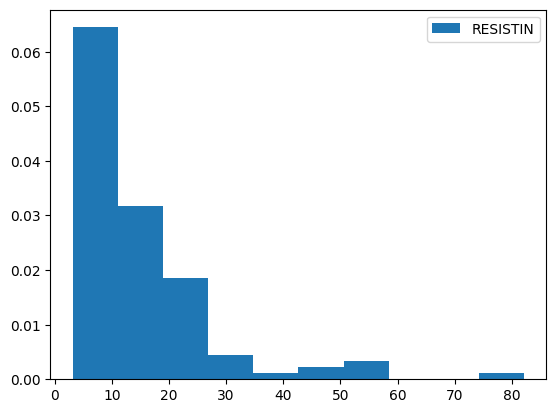

In [ ]:
#HISTOGRAM ZA RESISTIN
plt.hist(df['Resistin'], density=True, label='RESISTIN')
plt.legend()

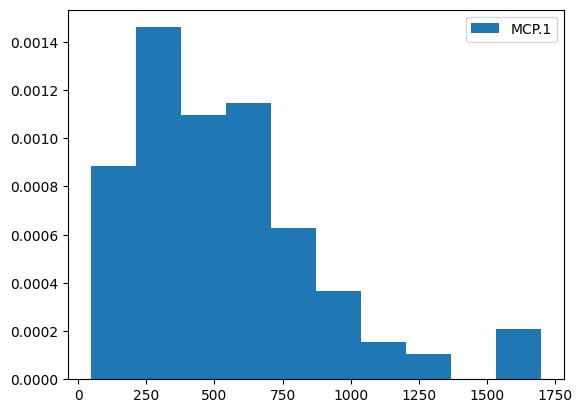

In [ ]:
#HISTOGRAM ZA MONOCYTE CHEMOATTRACTANT PROTEIN-1
plt.hist(df['MCP.1'], density=True, label='MCP.1')
plt.legend()

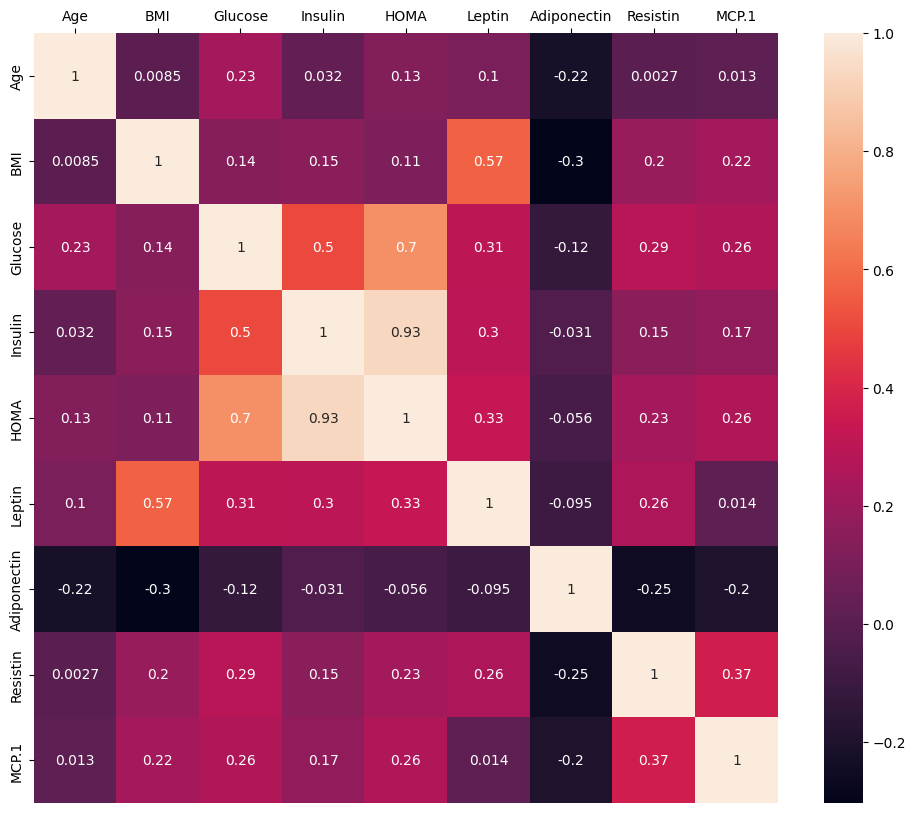

In [ ]:
#korelacije između svih obeležja pomoću heat mape
df_a = df.drop(columns='Classification')
mat_corr = df_a.corr()
plt.figure(figsize=(12, 10))
ax = sns.heatmap(mat_corr, annot=True) #annot za ispis brojeva
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top() #pomeram nazive obeležja na vrh osa
plt.show()

#što je veća (što je negativnija) vrednost -> veća pozitivna (negativna) korelacija

<Figure size 640x480 with 0 Axes>

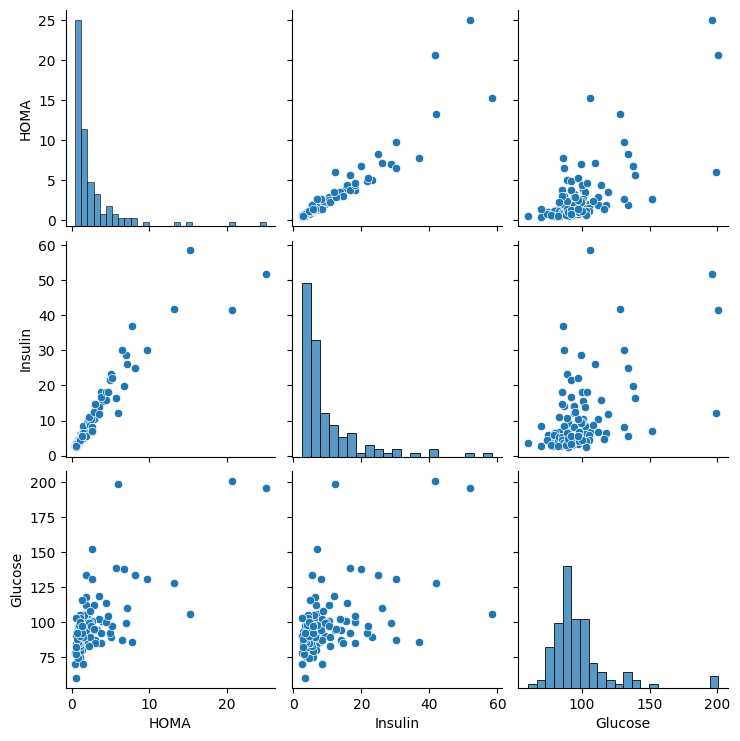

In [ ]:
#međusobne korelacije izabranih obeležja
plt.figure()
sns.pairplot(df, vars = ['HOMA','Insulin', 'Glucose'])
plt.show()

<Figure size 640x480 with 0 Axes>

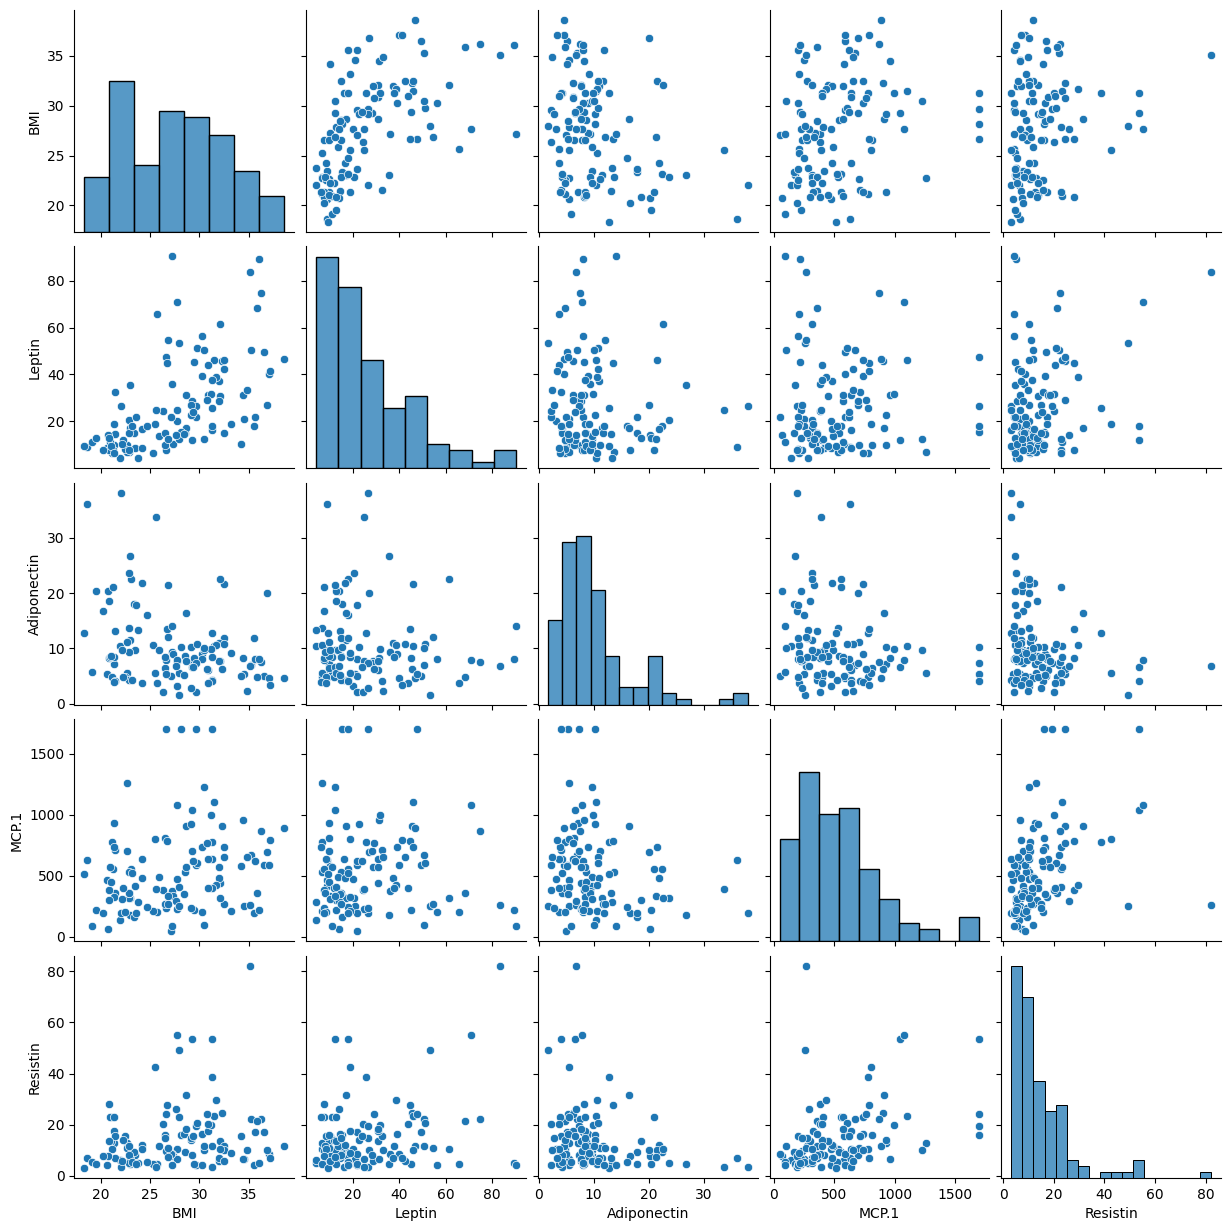

In [ ]:
plt.figure()
sns.pairplot(df, vars = ['BMI','Leptin', 'Adiponectin', 'MCP.1', 'Resistin'])
plt.show()

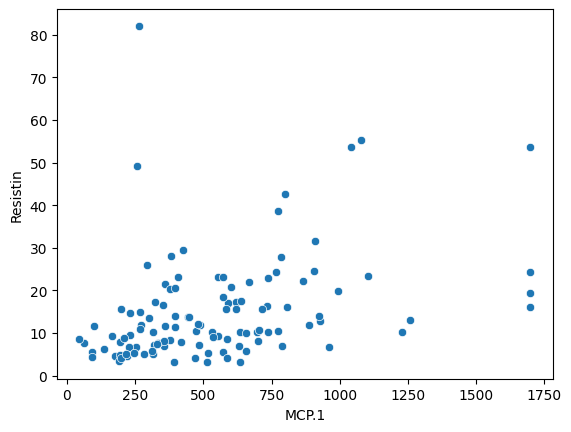

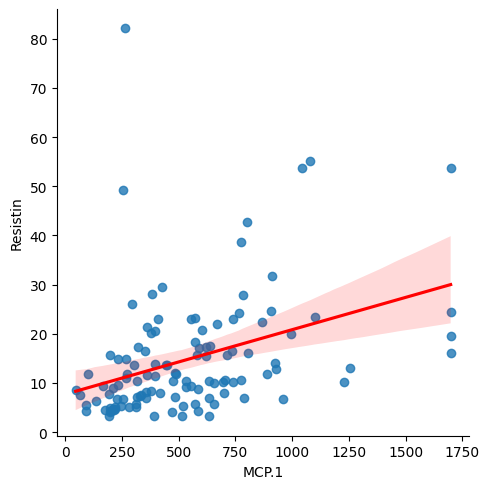

In [ ]:
sns.scatterplot(x='MCP.1', y='Resistin', data=df)
sns.lmplot(x='MCP.1', y='Resistin', data=df, line_kws={'color': 'red'})

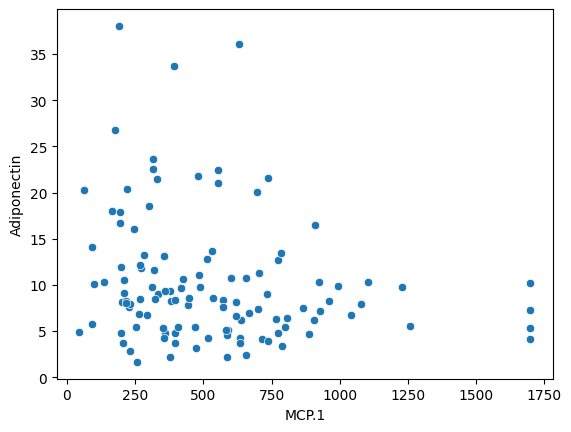

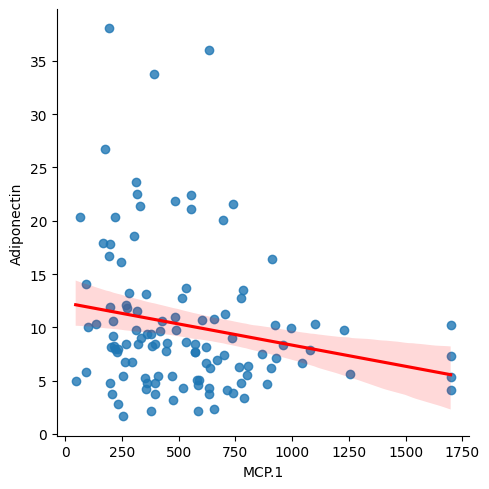

In [ ]:
sns.scatterplot(x='MCP.1', y='Adiponectin', data=df)
sns.lmplot(x='MCP.1', y='Adiponectin', data=df, line_kws={'color': 'red'})

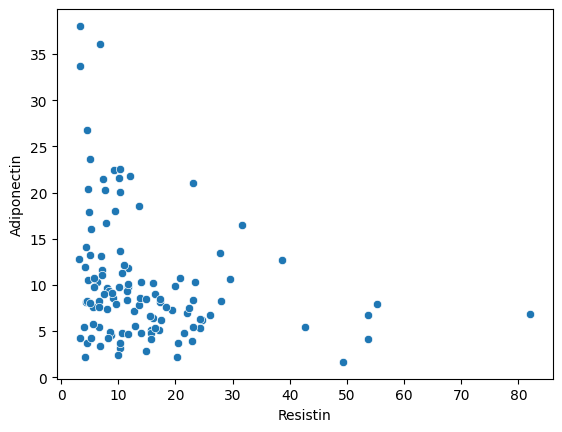

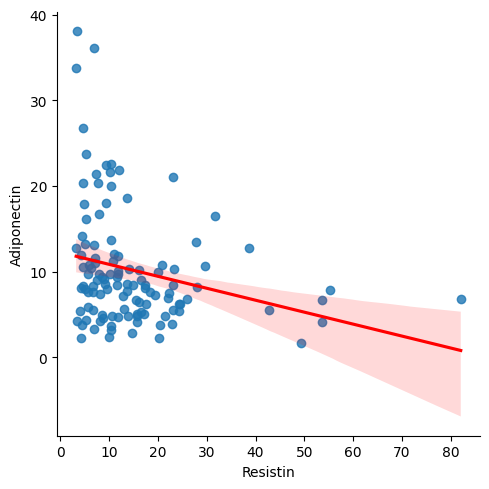

In [ ]:
sns.scatterplot(x='Resistin', y='Adiponectin', data=df)
sns.lmplot(x='Resistin', y='Adiponectin', data=df, line_kws={'color': 'red'})

<Figure size 640x480 with 0 Axes>

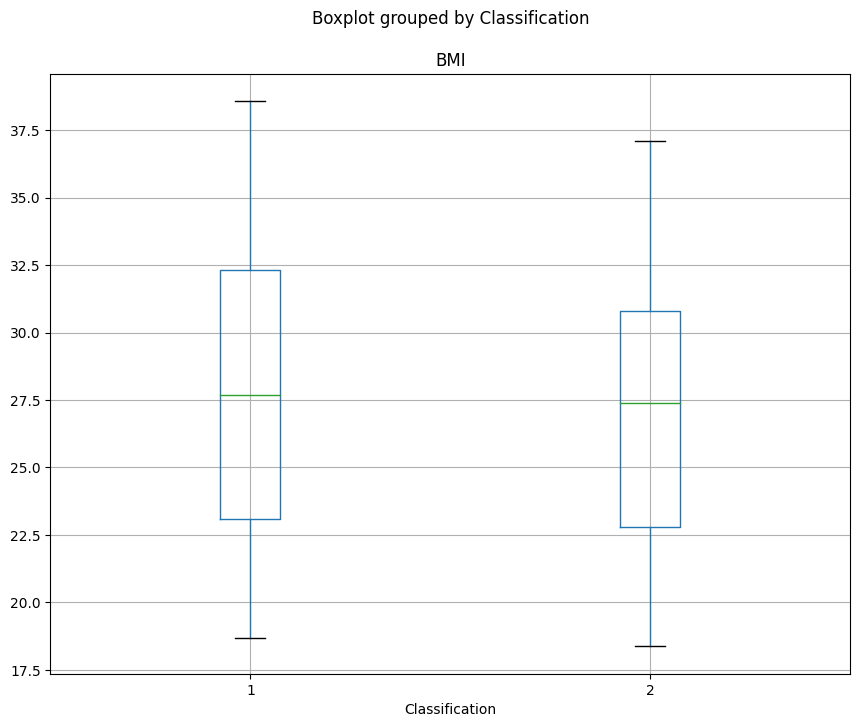

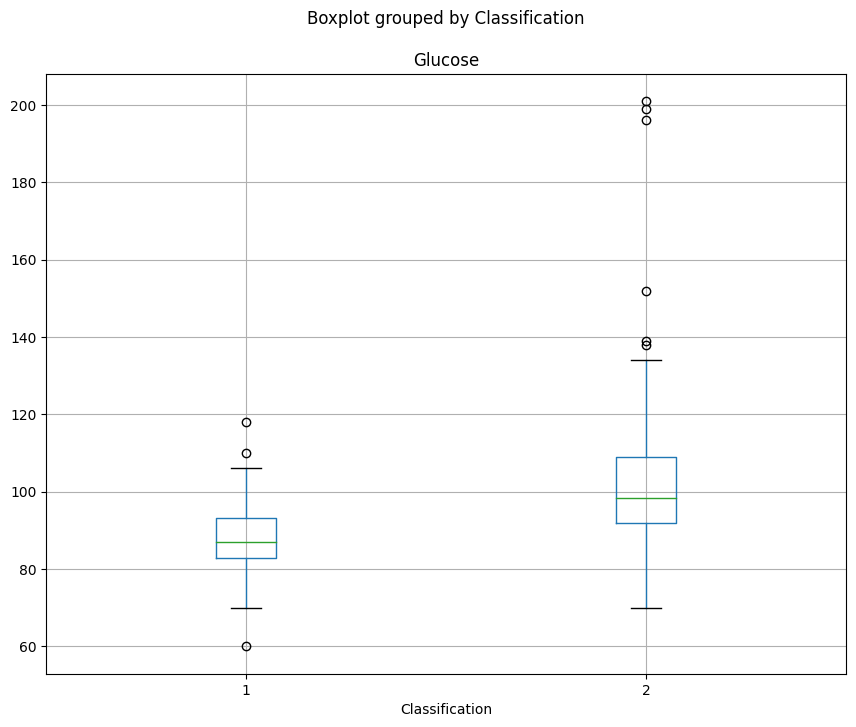

<Figure size 640x480 with 0 Axes>

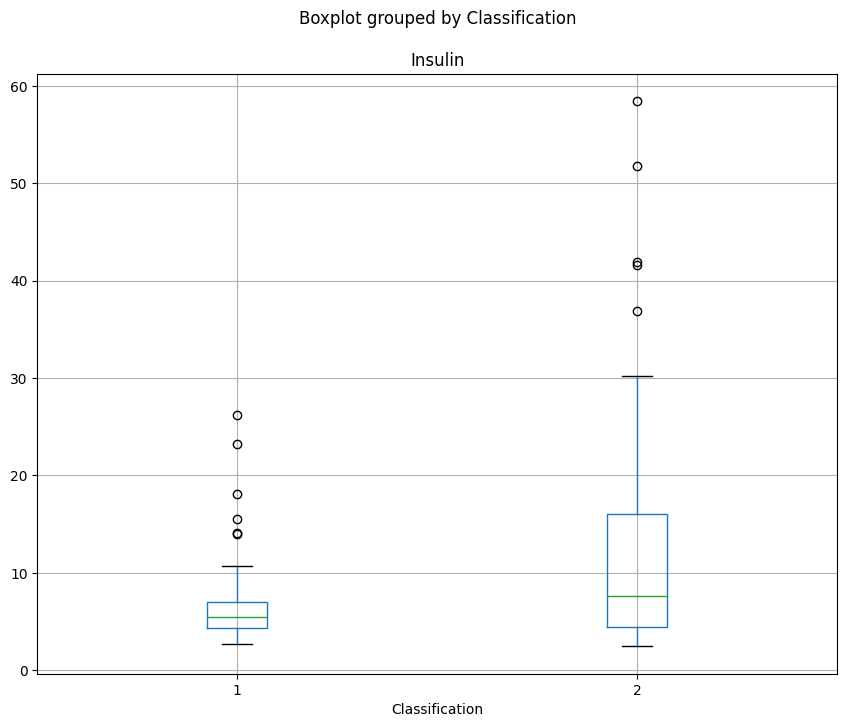

<Figure size 640x480 with 0 Axes>

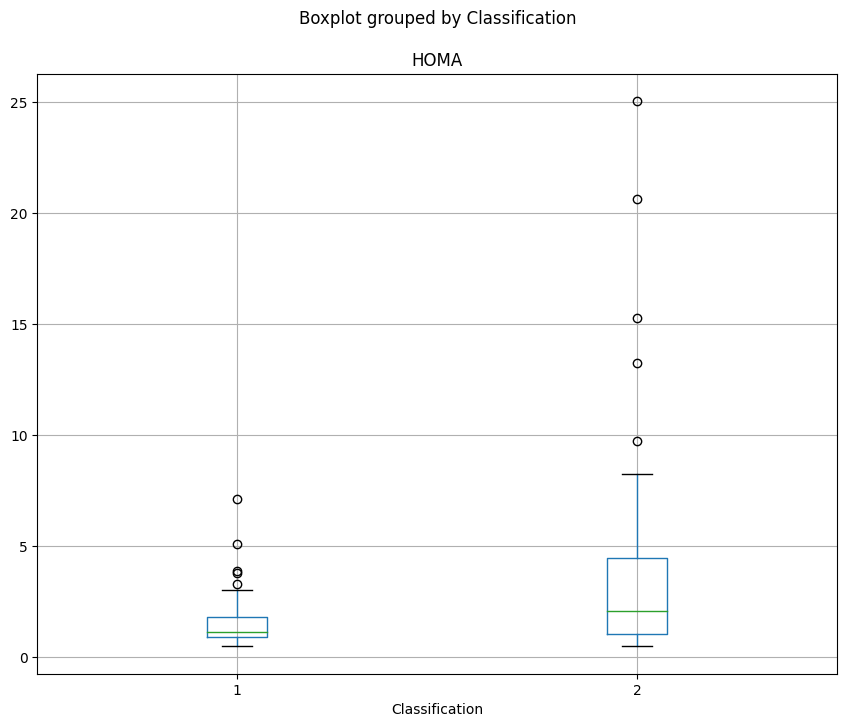

<Figure size 640x480 with 0 Axes>

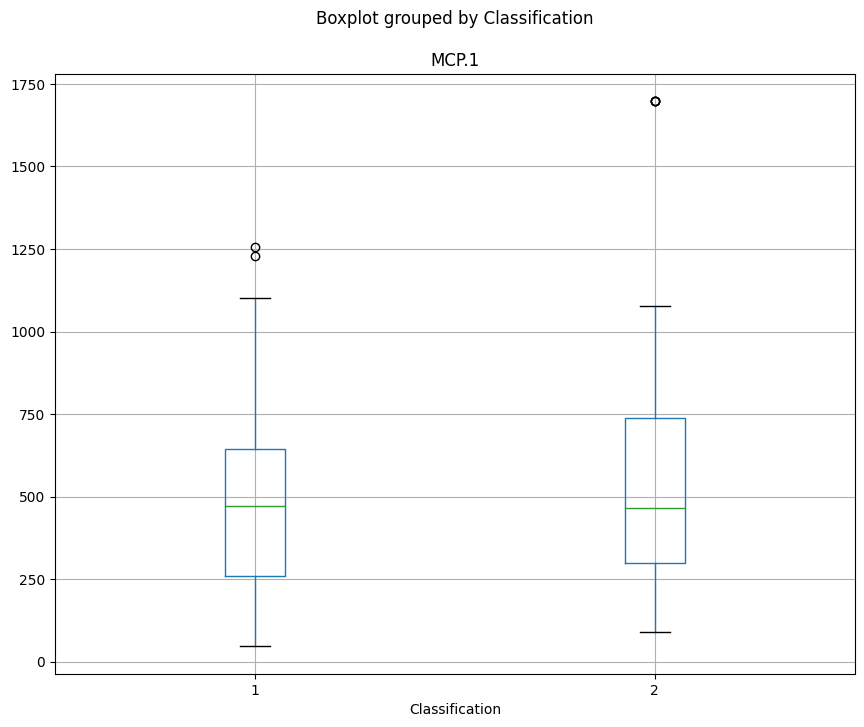

<Figure size 640x480 with 0 Axes>

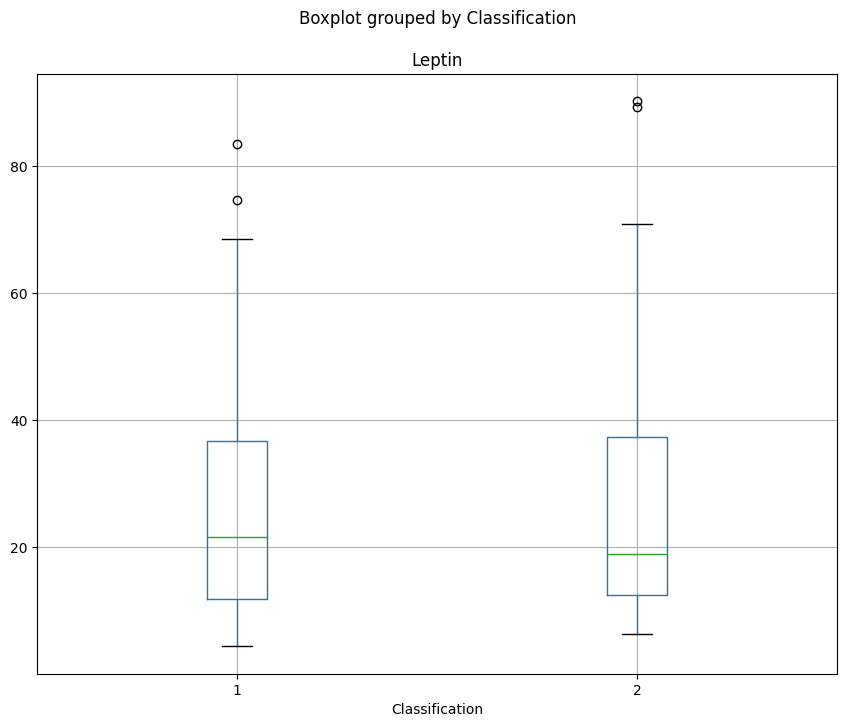

<Figure size 640x480 with 0 Axes>

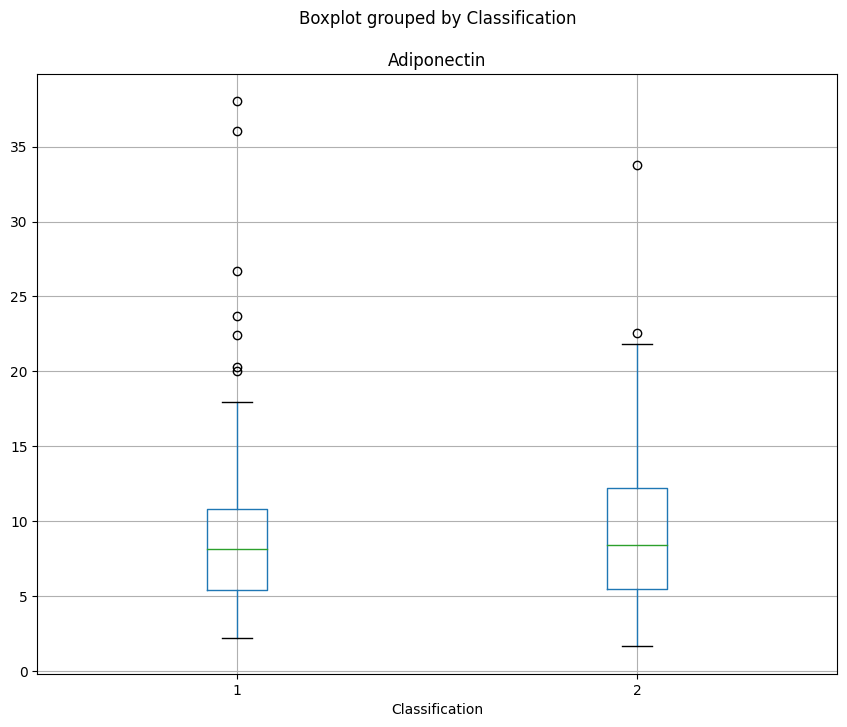

<Figure size 640x480 with 0 Axes>

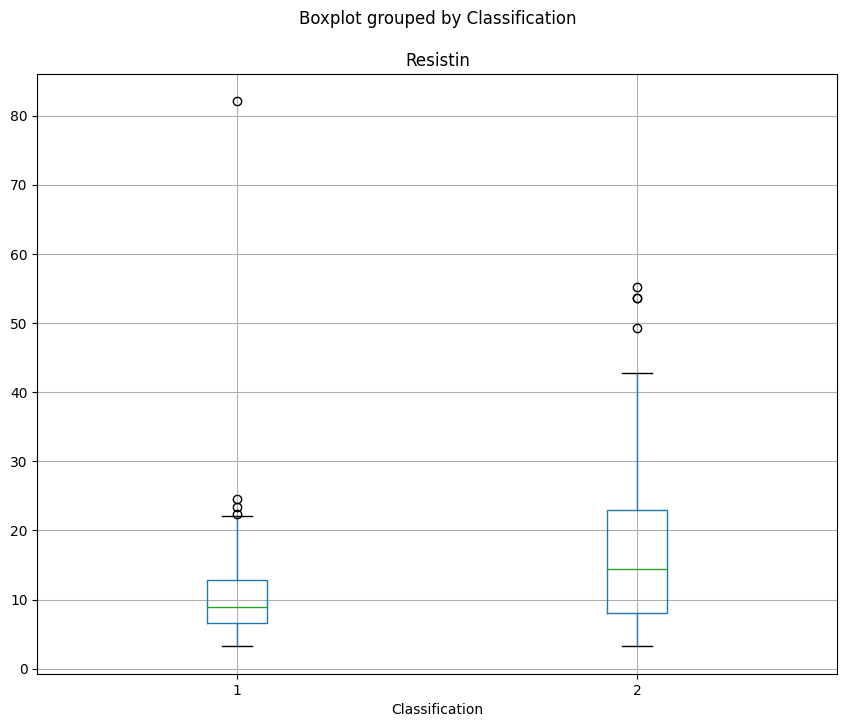

<Figure size 640x480 with 0 Axes>

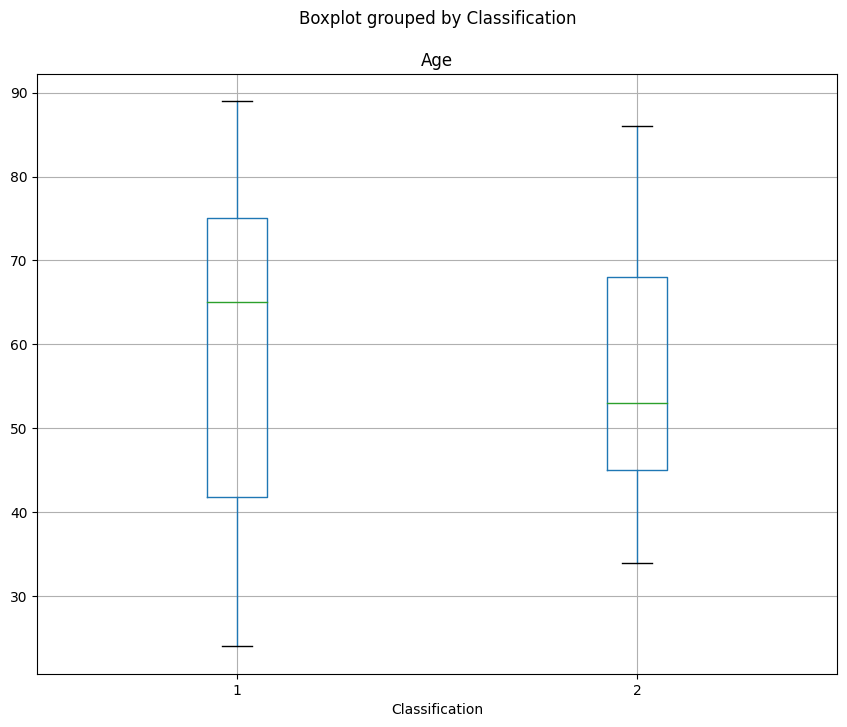

In [ ]:
grouped = df.groupby('Classification')

#Boxplot za BMI
plt.figure()
df.boxplot(column=['BMI'], by='Classification', figsize=(10, 8))
#sns.stripplot(x='Classification', y='BMI', data=df, jitter=True, color='black', alpha=0.5)
plt.show()

#za glukozu
df.boxplot(column=['Glucose'], by='Classification', figsize=(10, 8))
plt.show()

#za insulin
plt.figure()
df.boxplot(column=['Insulin'], by='Classification', figsize=(10, 8))
plt.show()

#za HOMU
plt.figure()
df.boxplot(column=['HOMA'], by='Classification', figsize=(10, 8))
plt.show()

#za MCP.1
plt.figure()
df.boxplot(column=['MCP.1'], by='Classification', figsize=(10, 8))
plt.show()

#za leptin
plt.figure()
df.boxplot(column=['Leptin'], by='Classification', figsize=(10, 8))
plt.show()

#za adiponectin
plt.figure()
df.boxplot(column=['Adiponectin'], by='Classification', figsize=(10, 8))
plt.show()

#za resistin
plt.figure()
df.boxplot(column=['Resistin'], by='Classification', figsize=(10, 8))
plt.show()

#za godine
plt.figure()
df.boxplot(column=['Age'], by='Classification', figsize=(10, 8))
plt.show()

In [ ]:
#Mann-Whitney U test (neparametarski statisticki test)

def Mann_Whitney_test (feature):
  class_1 = df[df['Classification'] == 1][feature]
  class_2 = df[df['Classification'] == 2][feature]

  statistic, p_value = stats.mannwhitneyu(class_1, class_2)

  print('Mann-Whitney U test statistic:', statistic)
  print('P-value:', p_value)
  print("_____________________________________________________")


print("Results for BMI")
Mann_Whitney_test('BMI')

print("Results for GLUCOSE")
Mann_Whitney_test('Glucose')

print("Results for INSULIN")
Mann_Whitney_test('Insulin')

print("Results for HOMA")
Mann_Whitney_test('HOMA')

print("Results for MCP.1")
Mann_Whitney_test('MCP.1')

print("Results for LEPTIN")
Mann_Whitney_test('Leptin')

print("Results for ADIPONECTIN")
Mann_Whitney_test('Adiponectin')

print("Results for RESISTIN")
Mann_Whitney_test('Resistin')

print("Results for AGE")
Mann_Whitney_test('Age')



#rezultati ukazuju na statistički značajne razlike između skupova podataka za GLUCOSE, INSULIN, HOMA i RESISTIN, dok nema statistički značajnih razlika za BMI, MCP.1, LEPTIN, ADIPONECTIN i AGE.
#. P-vrednost predstavlja verovatnocu da su dobijeni rezultati slučajni, a obično se smatra statistički značajnom ako je manja od 0,05. GLUCOSE, INSULIN, HOMA i RESISTIN imaju p-vrednosti manje od 0,05, što znači da su razlike između tih skupova podataka statistički značajne. S druge strane, BMI, MCP.1, LEPTIN, ADIPONECTIN i AGE imaju p-vrednosti veće od 0,05, što znači da nisu statistički značajne razlike između tih skupova podataka.


Results for BMI
Mann-Whitney U test statistic: 1894.5
P-value: 0.20165625039015556
_____________________________________________________
Results for GLUCOSE
Mann-Whitney U test statistic: 783.5
P-value: 1.0187199772435044e-06
_____________________________________________________
Results for INSULIN
Mann-Whitney U test statistic: 1264.0
P-value: 0.026567447259174943
_____________________________________________________
Results for HOMA
Mann-Whitney U test statistic: 1127.0
P-value: 0.002898046655843502
_____________________________________________________
Results for MCP.1
Mann-Whitney U test statistic: 1543.0
P-value: 0.503519738724716
_____________________________________________________
Results for LEPTIN
Mann-Whitney U test statistic: 1652.0
P-value: 0.9490963408084461
_____________________________________________________
Results for ADIPONECTIN
Mann-Whitney U test statistic: 1610.0
P-value: 0.7664643158618509
_____________________________________________________
Results for RESISTI

In [ ]:
#obeležja
X = df.drop(['Classification'], axis=1).copy()
#izlaz
y =df['Classification'].copy()




In [ ]:
#scaler = StandardScaler()
#scaler.fit(X)
#X = pd.DataFrame(scaler.transform(X))

In [ ]:
# Apply PCA
#pca = PCA(n_components=0.99)
#X = pd.DataFrame(pca.fit_transform(X))
#print('n components:', pca.n_components_)

n components: 8


In [ ]:
def train_evaluate_model(model, params):

  accuracies = []
  precisions = []
  recalls = []
  specificities = []
  f1s = []
  fprs = []
  tprs = []
  aucs = []
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  final_conf_matrix = np.zeros((len(np.unique(y)),len(np.unique(y))))


  for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
      X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
      y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

      #Scaler
      scaler = StandardScaler()
      scaler.fit(X_train_fold)
      X_train_fold = pd.DataFrame(scaler.transform(X_train_fold))
      X_test_fold = pd.DataFrame(scaler.transform(X_test_fold))

      #PCA
      #pca = PCA(n_components=0.99)
      #pca.fit(X_train_fold)
      #X_train_fold = pd.DataFrame(pca.transform(X_train_fold))
      #X_test_fold = pd.DataFrame(pca.transform(X_test_fold))
      #print('PCA n components:', pca.n_components_)

      grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 4, scoring = "accuracy", verbose = 3)
      grid_search.fit(X_train_fold, y_train_fold)

      best_model = grid_search.best_estimator_

      best_model.fit(X_train_fold, y_train_fold)

      y_pred = best_model.predict(X_test_fold)

      conf_matrix = confusion_matrix(y_test_fold, y_pred, labels= np.unique(y))
      final_conf_matrix += conf_matrix

      accuracy = accuracy_score(y_test_fold, y_pred)    #tacnost
      precision = precision_score(y_test_fold, y_pred, average='macro')  #preciznost
      recall = recall_score(y_test_fold, y_pred, average='macro')        #osetljvost
      f1 = f1_score(y_test_fold, y_pred, average='macro')

      precision_micro = precision_score(y_test_fold, y_pred, average='micro')  #preciznost
      recall_micro = recall_score(y_test_fold, y_pred, average='micro')        #osetljvost

      specificity = specificity_score(y_test_fold, y_pred)
      fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred, pos_label=2)
      auc = roc_auc_score(y_test_fold, y_pred)

      accuracies.append(accuracy)
      precisions.append(precision)
      recalls.append(recall)
      f1s.append(f1)
      specificities.append(specificity)
      fprs.append(fpr)
      tprs.append(tpr)
      aucs.append(auc)

      #tačnost, preciznost i osetljivost za svaki fold
      print(f"Fold {fold}: \n best_params={grid_search.best_params_}\n accuracy = {accuracy:.3f}, precision_micro = {precision_micro:.3f}, recall_micro = {recall_micro:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1_score = {f1:.3f}, specificity = {specificity:.3f}")

  #prosečna tačnost, preciznost i osetljivost za sve foldove
  average_accuracy = sum(accuracies) / len(accuracies)
  average_precision = sum(precisions) / len(precisions)
  average_recall = sum(recalls) / len(recalls)
  average_f1_score = sum(f1s) / len(f1s)
  average_specificity = sum(specificities) / len(specificities)
  print(f"Average accuracy = {average_accuracy}, average precision = {average_precision}, average recall = {average_recall}, average f1 score = {average_f1_score}, average specificity = {average_specificity}")

  average_fpr = np.mean(fprs, axis=0)
  average_tpr = np.mean(tprs, axis=0)
  average_auc = sum(aucs) / len(aucs)

  #plotovanje ROC krive
  plt.plot(average_fpr, average_tpr, label='Average ROC Curve (AUC = %0.2f)' % average_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc="lower right")
  plt.show()

  print('Finalna matrica konfuzije je: ')
  disp = ConfusionMatrixDisplay(confusion_matrix = final_conf_matrix, display_labels=np.unique(y))
  disp.plot(values_format = '.5g', cmap="Blues") # values_format=' ' služi da vrednosti npr. 3.1e+04 na grafiku predstavi čitljivije
  plt.show()

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV 1/4] END C=0.001, max_iter=150, penalty=l1, solver=liblinear;, score=0.478 total time=   0.0s
[CV 2/4] END C=0.001, max_iter=150, penalty=l1, solver=liblinear;, score=0.435 total time=   0.0s
[CV 3/4] END C=0.001, max_iter=150, penalty=l1, solver=liblinear;, score=0.435 total time=   0.0s
[CV 4/4] END C=0.001, max_iter=150, penalty=l1, solver=liblinear;, score=0.435 total time=   0.0s
[CV 1/4] END C=0.001, max_iter=150, penalty=l2, solver=liblinear;, score=0.609 total time=   0.0s
[CV 2/4] END C=0.001, max_iter=150, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 3/4] END C=0.001, max_iter=150, penalty=l2, solver=liblinear;, score=0.696 total time=   0.0s
[CV 4/4] END C=0.001, max_iter=150, penalty=l2, solver=liblinear;, score=0.522 total time=   0.0s
[CV 1/4] END C=0.001, max_iter=200, penalty=l1, solver=liblinear;, score=0.478 total time=   0.0s
[CV 2/4] END C=0.001, max_iter=200, penalty=l1, solver=l

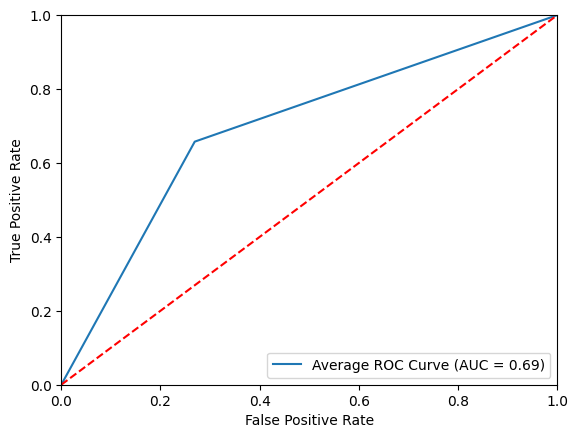

Finalna matrica konfuzije je: 


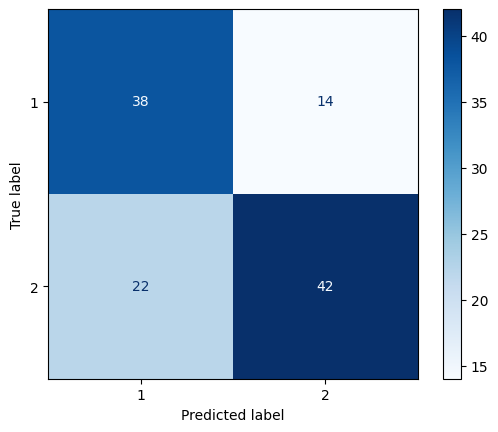

In [ ]:
#izbor najboljih parametara za logističku regresiju + treniranje i testiranje
params_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [150, 200, 250],
    'solver': ['liblinear']
}

logistic_regression = LogisticRegression(random_state=42)

train_evaluate_model(logistic_regression, params_log_reg)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV 1/4] END ..............C=0.1, kernel=linear;, score=0.522 total time=   0.0s
[CV 2/4] END ..............C=0.1, kernel=linear;, score=0.652 total time=   0.0s
[CV 3/4] END ..............C=0.1, kernel=linear;, score=0.696 total time=   0.0s
[CV 4/4] END ..............C=0.1, kernel=linear;, score=0.478 total time=   0.0s
[CV 1/4] END .................C=0.1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 2/4] END .................C=0.1, kernel=rbf;, score=0.565 total time=   0.0s
[CV 3/4] END .................C=0.1, kernel=rbf;, score=0.565 total time=   0.0s
[CV 4/4] END .................C=0.1, kernel=rbf;, score=0.565 total time=   0.0s
[CV 1/4] END .............C=0.1, kernel=sigmoid;, score=0.522 total time=   0.0s
[CV 2/4] END .............C=0.1, kernel=sigmoid;, score=0.565 total time=   0.0s
[CV 3/4] END .............C=0.1, kernel=sigmoid;, score=0.565 total time=   0.0s
[CV 4/4] END .............C=0.1, kernel=sigmoid;

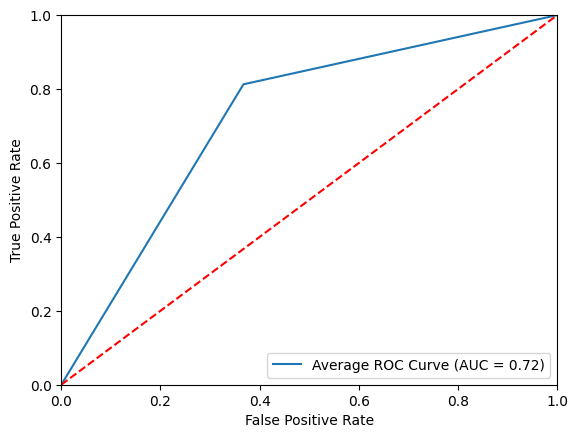

Finalna matrica konfuzije je: 


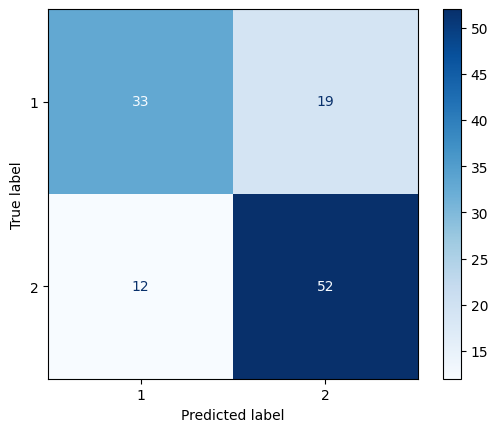

In [ ]:
#izbor najboljih parametara za SVM + treniranje i testiranje

params_SVC = {
    'kernel' : ['linear', 'rbf', 'sigmoid', 'poly'],
    'C' : [0.1, 1, 10]
}

svc = SVC()

train_evaluate_model(svc, params_SVC)

Streaming output truncated to the last 5000 lines.
[CV 1/4] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.609 total time=   0.1s
[CV 2/4] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.783 total time=   0.1s
[CV 3/4] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.783 total time=   0.1s
[CV 4/4] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=40;, score=0.609 total time=   0.1s
[CV 1/4] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.522 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.739 total time=   0.0s
[CV 3/4] END criterion=en

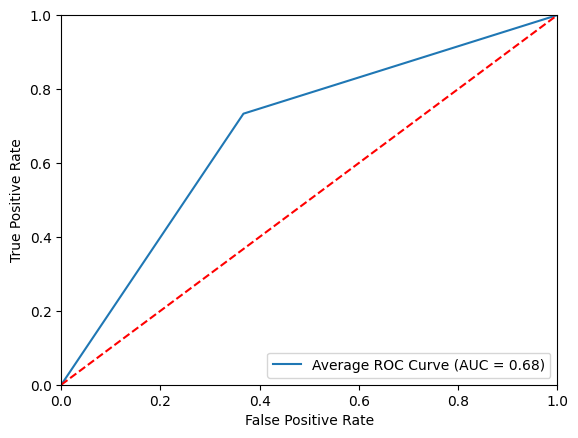

Finalna matrica konfuzije je: 


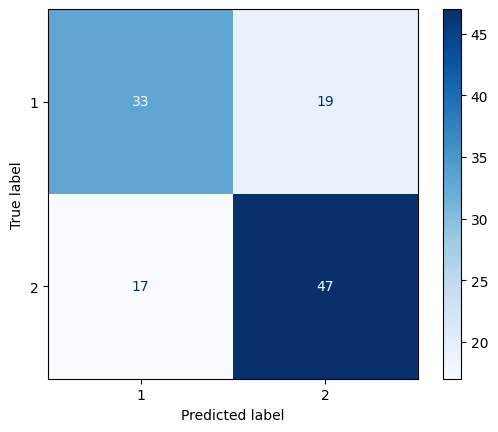

In [ ]:
#izbor najboljih parametara za Random Forest + treniranje i testiranje

params_rf = {
  'n_estimators': [10, 20, 30, 40], #broj stabala u sumi
  'criterion': ['gini', 'entropy'], #funkcija nečistoće čvora
  'max_depth': [None, 5, 10], #maksimalna dubina stabla
  'min_samples_split': [2, 3, 5], #minimalan broj uzoraka potreban za razdvajanje čvora
  'min_samples_leaf': [1, 2], #minimalan broj uzoraka koji se nalaze u listu
  'max_features': ['sqrt', 'log2'] #funkcija za preračunavanje broja obeležja za najbolju podelu
}

random_forest = RandomForestClassifier()

train_evaluate_model(random_forest, params_rf)


Fitting 4 folds for each of 90 candidates, totalling 360 fits
[CV 1/4] END estimator=RandomForestClassifier(), max_features=0.5, max_samples=0.5, n_estimators=10, random_state=42;, score=0.565 total time=   1.9s
[CV 2/4] END estimator=RandomForestClassifier(), max_features=0.5, max_samples=0.5, n_estimators=10, random_state=42;, score=0.696 total time=   1.6s
[CV 3/4] END estimator=RandomForestClassifier(), max_features=0.5, max_samples=0.5, n_estimators=10, random_state=42;, score=0.652 total time=   1.6s
[CV 4/4] END estimator=RandomForestClassifier(), max_features=0.5, max_samples=0.5, n_estimators=10, random_state=42;, score=0.652 total time=   1.5s
[CV 1/4] END estimator=RandomForestClassifier(), max_features=0.5, max_samples=0.5, n_estimators=20, random_state=42;, score=0.522 total time=   3.1s
[CV 2/4] END estimator=RandomForestClassifier(), max_features=0.5, max_samples=0.5, n_estimators=20, random_state=42;, score=0.739 total time=   4.2s
[CV 3/4] END estimator=RandomForestCla

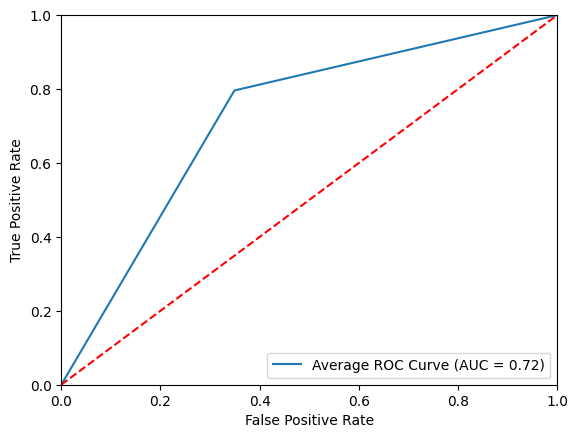

Finalna matrica konfuzije je: 


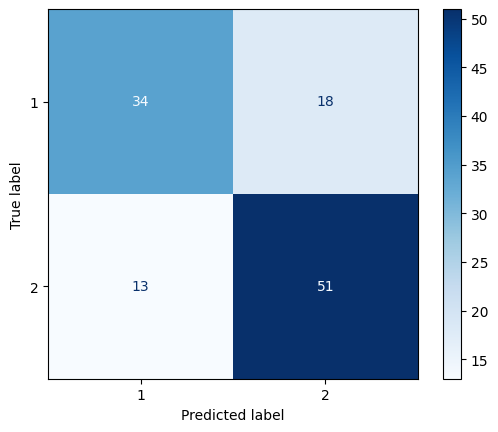

In [ ]:
#izbor najboljih parametara za bagging + treniranje i testiranje

params_bagging = {

  'estimator': [random_forest, svc],
  'n_estimators': [10, 20, 50, 80, 100],
  'max_samples': [0.5, 0.7, 0.9],
  'max_features': [0.5, 0.7, 0.9],
  'random_state': [42]
  pppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjjgggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggggttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttAssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssss
}

bagging_clf = BaggingClassifier()  #bootstrap = True je po defaultu
train_evaluate_model(bagging_clf, params_bagging)